In [1]:
import os 
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import networkx as nx 
from copy import deepcopy as dc
import matplotlib.pyplot as plt
import network_analysis as nta
import random
from copy import deepcopy as dc
import sampling_analysis as sa
import seaborn as sns
import copy
from collections import Counter

In [2]:
level = 'g'
indir = '../data/ENV'
outdir = '../result/S2_ENV/feature'
if not os.path.exists(outdir):
    os.makedirs(outdir)

data_dict = {}
for file in os.listdir(indir):
    if not file.endswith('_{}.tsv'.format(level)):
        continue
    print(file)
    infile = os.path.join(indir, file)
    dtype = file.split('_plasmid')[0].split('arg_')[-1]
    data = pd.read_csv(infile, sep='\t', header=0, index_col=0)
    data[data>0] = 1
    data_dict[dtype] = dc(data)


env_Aquatic_plasmid_network_g.tsv
env_Human_plasmid_network_g.tsv
env_Plants_plasmid_network_g.tsv
env_Terrestrial_plasmid_network_g.tsv


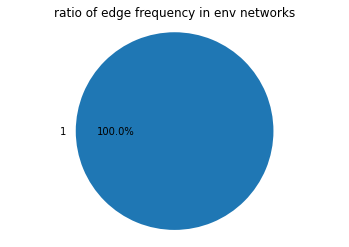

In [3]:
occurrence_df = pd.DataFrame()
for k in data_dict.keys():
    df = copy.deepcopy(data_dict[k])
    occurrence_df, df = occurrence_df.align(df, fill_value=0)
    occurrence_df += df

values = np.triu(occurrence_df.values, k=1)
counter = Counter(values.flatten())
edge_num = len(values.flatten()) - counter[0]
edge_freq = {}
for k, v in counter.items():
    v = v/edge_num
    edge_freq[k] = v
del edge_freq[0]

types = list(edge_freq.keys())
percentages = list(edge_freq.values())

plt.pie(percentages, labels=types, autopct='%1.1f%%')
plt.axis('equal')  # 使饼图为正圆形

plt.title('ratio of edge frequency in env networks')

plt.savefig(os.path.join(outdir, 'edge_freq.svg'), format='svg', dpi=300)

plt.show()

In [4]:
# find the index and col of value 2 in currence_df
indices = occurrence_df[occurrence_df == 2].stack()
values = np.triu(occurrence_df.values, k=1)
counter = Counter(values.flatten())


env_Aquatic: 0 7 0.0
env_Human: 0 72 0.0
env_Plants: 0 5 0.0
env_Terrestrial: 0 2 0.0


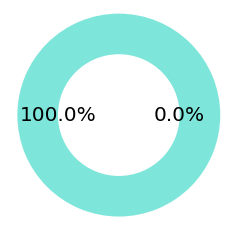

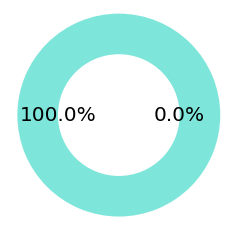

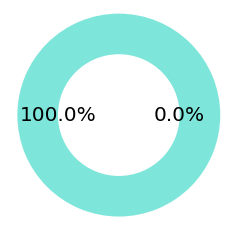

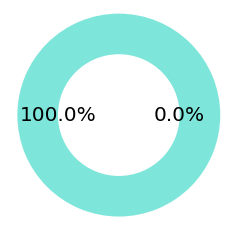

In [5]:
for env, df in data_dict.items():
    sp_list = list(df.columns)
    edge_n = 0
    common_n = 0
    for i in range(len(sp_list)):
        for j in range(i+1, len(sp_list)):
            if df.iloc[i, j] > 0:
                edge_n += 1
                if occurrence_df.loc[sp_list[i], sp_list[j]] > 1:
                    common_n += 1
    types = ['generalist', 'specialist']
    percentages = [common_n, edge_n-common_n]
    print(f'{env}: {common_n} {edge_n} {common_n/edge_n}')
    plt.figure(figsize=(4, 4))
    color_list = [(247/256,220/256,111/256, 0.7),(72/256, 220/256, 204/256, 0.7)]
    plt.pie(percentages, labels=[""]*2,  autopct='%1.1f%%', wedgeprops={'width': 0.4}, textprops={'fontsize': 20}, colors=color_list)
    # autopct='%1.1f%%',labels=types,
    plt.axis('equal')  
    #plt.title('ratio of generalist in {} networks'.format(env))
    plt.title("")
    plt.savefig(os.path.join(outdir, '{}_edge_freq.svg'.format(env)), format='svg', dpi=300)

       

In [6]:
edge_df = pd.DataFrame(columns=['node1', 'node2'])
for ids in indices.index:
    for env, df in data_dict.items():
        if ids[0] in df.columns and ids[1] in df.columns:
            if df.loc[ids[0], ids[1]] > 0:
                if edge_df[(edge_df['node1'] == ids[0]) & (edge_df['node2'] == ids[1])].shape[0] > 0:
                    i = edge_df[(edge_df['node1'] == ids[0]) & (edge_df['node2'] == ids[1])].index[0]
                elif edge_df[(edge_df['node1'] == ids[1]) & (edge_df['node2'] == ids[0])].shape[0] > 0:
                    i = edge_df[(edge_df['node1'] == ids[1]) & (edge_df['node2'] == ids[0])].index[0]
                else:
                    i = edge_df.shape[0]
                    edge_df.loc[i, 'node1'] = ids[0]
                    edge_df.loc[i, 'node2'] = ids[1]
                edge_df.loc[i, env] = 1
edge_df.fillna(0, inplace=True)
            

In [7]:
edge_df.to_csv(os.path.join(outdir, 'edge_twice.tsv'), sep='\t', header=True, index=False)